In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings('ignore')

In [60]:
# Load the data
traffic_data = pd.read_csv('traffic.csv')

traffic_data.head()

,DateTime,Junction,Vehicles,ID
0,11/1/2015 0:00,1,15,20151101001
1,11/1/2015 1:00,1,13,20151101011
2,11/1/2015 2:00,1,10,20151101021
3,11/1/2015 3:00,1,7,20151101031
4,11/1/2015 4:00,1,9,20151101041


# EDA

In [61]:
# Convert 'DateTime' to datetime object
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

missing_values = traffic_data.isnull().sum()

duplicates = traffic_data.duplicated().sum()

# Summary statistics for the 'Vehicles' column
vehicles_stats = traffic_data['Vehicles'].describe()

missing_values, duplicates, vehicles_stats

(DateTime    0
 Junction    0
 Vehicles    0
 ID          0
 dtype: int64,
 0,
 count    48120.000000
 mean        22.791334
 std         20.750063
 min          1.000000
 25%          9.000000
 50%         15.000000
 75%         29.000000
 max        180.000000
 Name: Vehicles, dtype: float64)

# Histogram of the Vehicles column

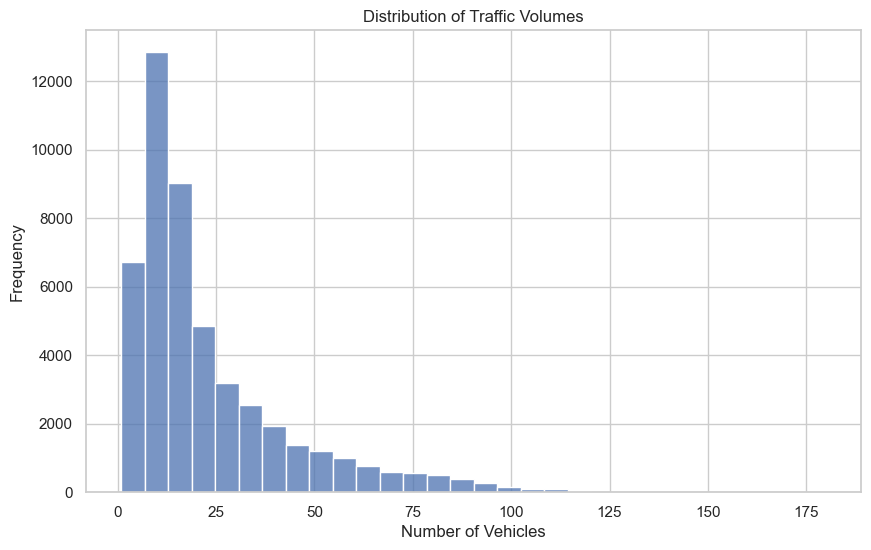

In [62]:
# Set the style of seaborn

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(traffic_data['Vehicles'], kde=False, bins=30)
plt.title('Distribution of Traffic Volumes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# line plot of traffic volume over time

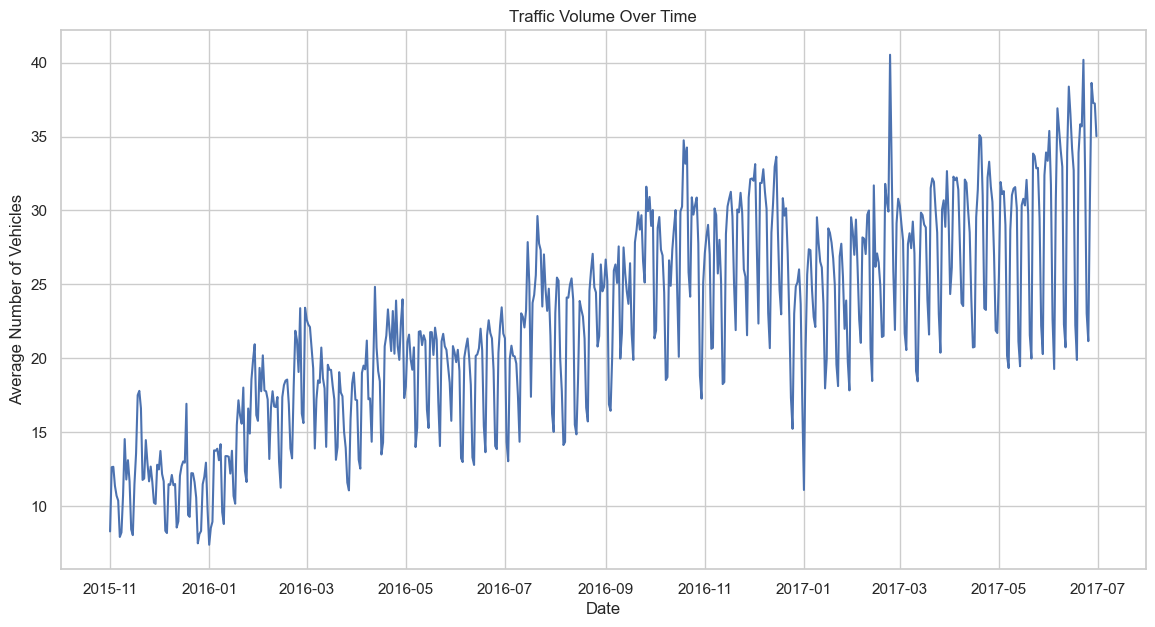

In [63]:
plt.figure(figsize=(14, 7))
traffic_data_resampled = traffic_data.set_index('DateTime').resample('D').mean()
sns.lineplot(data=traffic_data_resampled, x=traffic_data_resampled.index, y='Vehicles')
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Vehicles')
plt.show()

# Boxplots to compare traffic volumes across different junctions

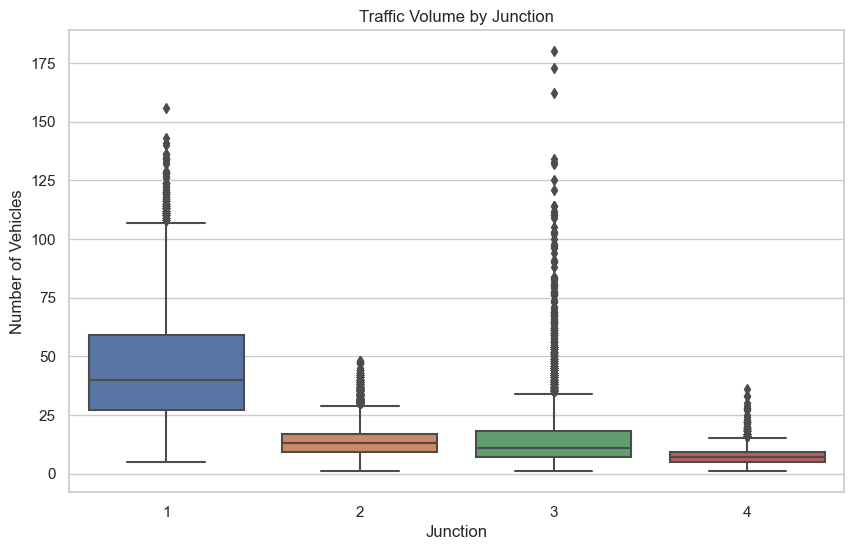

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Junction', y='Vehicles', data=traffic_data)
plt.title('Traffic Volume by Junction')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.show()

# Identifying peak traffic hours and analyzing traffic patterns by the day of the week

In [65]:
# Create new columns for hour of the day and day of the week

traffic_data['HourOfDay'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.day_name()

In [66]:
# Aggregate data to find mean traffic volume for each hour of the day

hourly_traffic = traffic_data.groupby('HourOfDay')['Vehicles'].mean().reset_index()

# Aggregate data to find mean traffic volume for each day of the week

weekly_traffic = traffic_data.groupby('DayOfWeek')['Vehicles'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

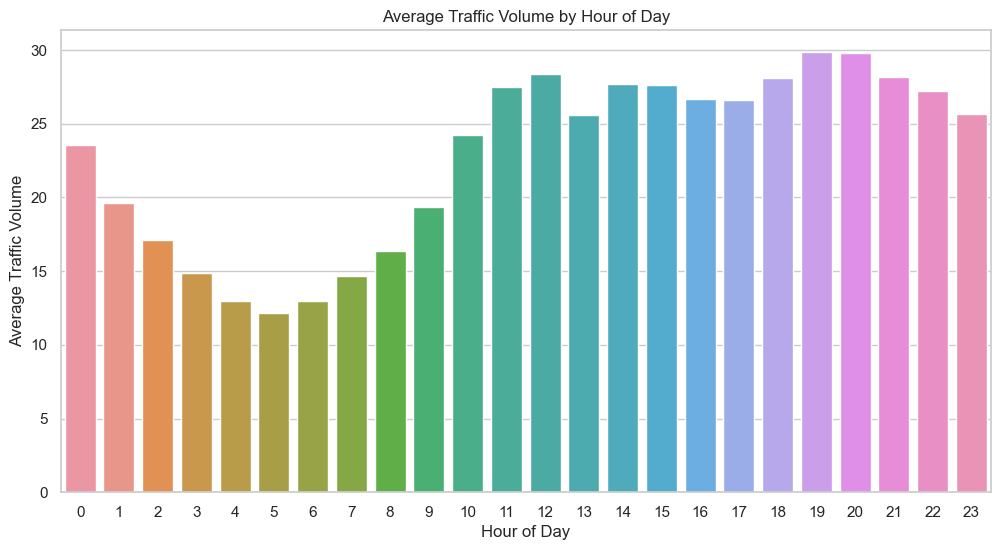

In [67]:
# Plotting the hourly traffic volume

plt.figure(figsize=(12, 6))
sns.barplot(x='HourOfDay', y='Vehicles', data=hourly_traffic)
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(np.arange(0, 24, 1))
plt.show()

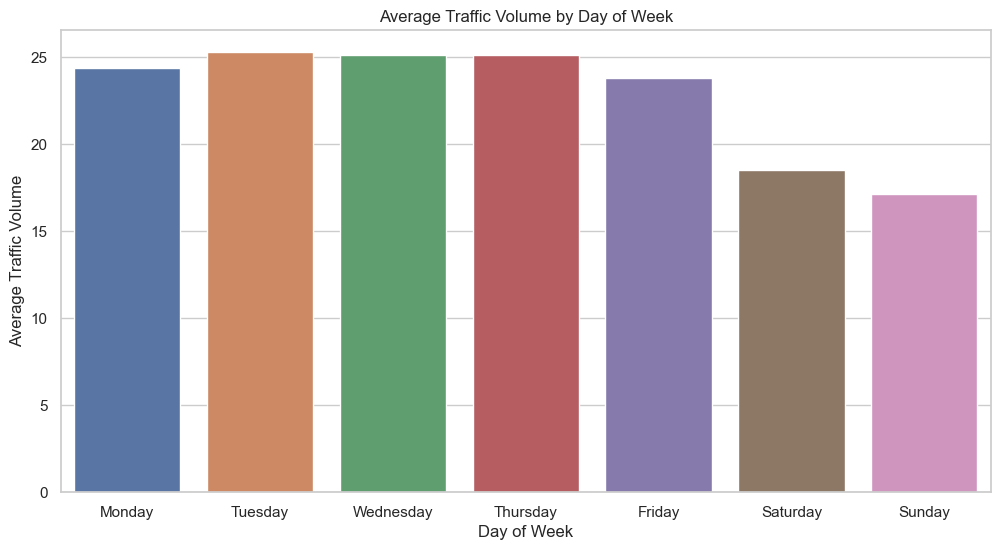

In [68]:
# Plotting the daily traffic volume

plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Vehicles', data=weekly_traffic)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.show()

# Peak Hours Identification

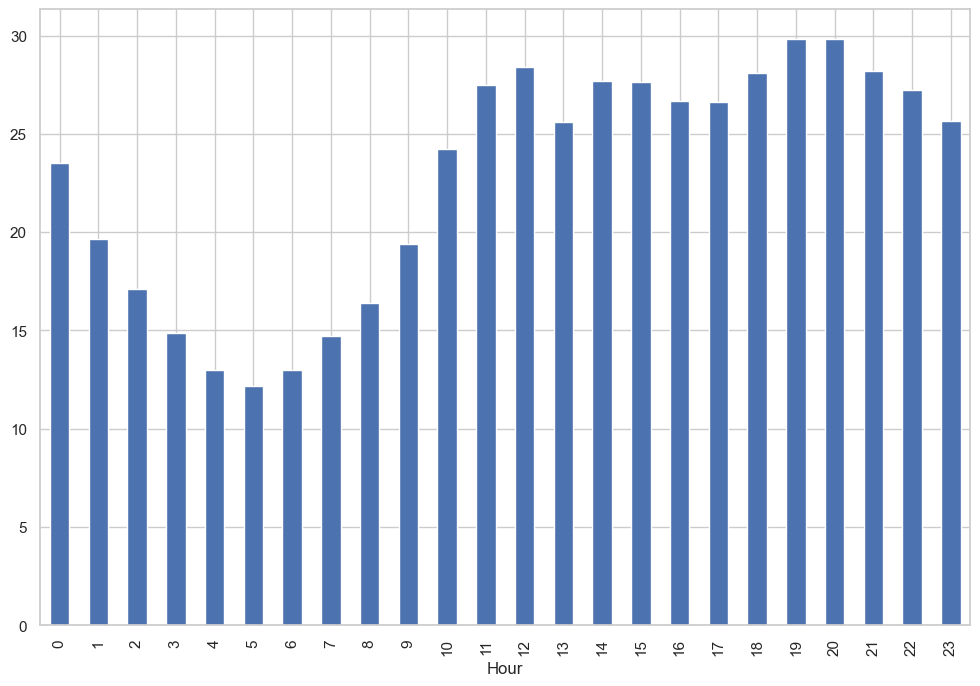

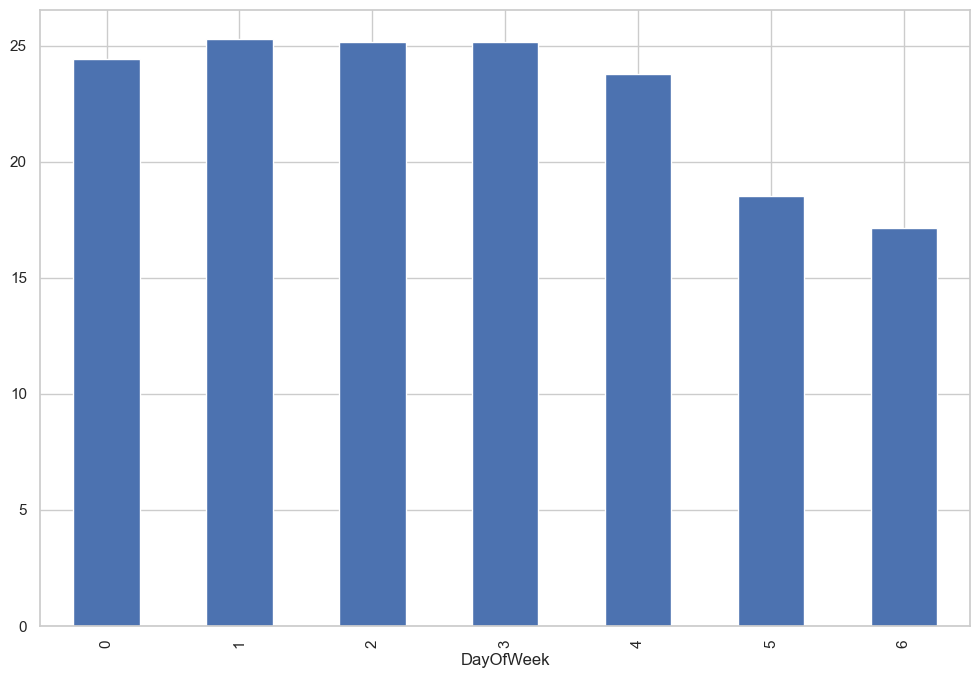

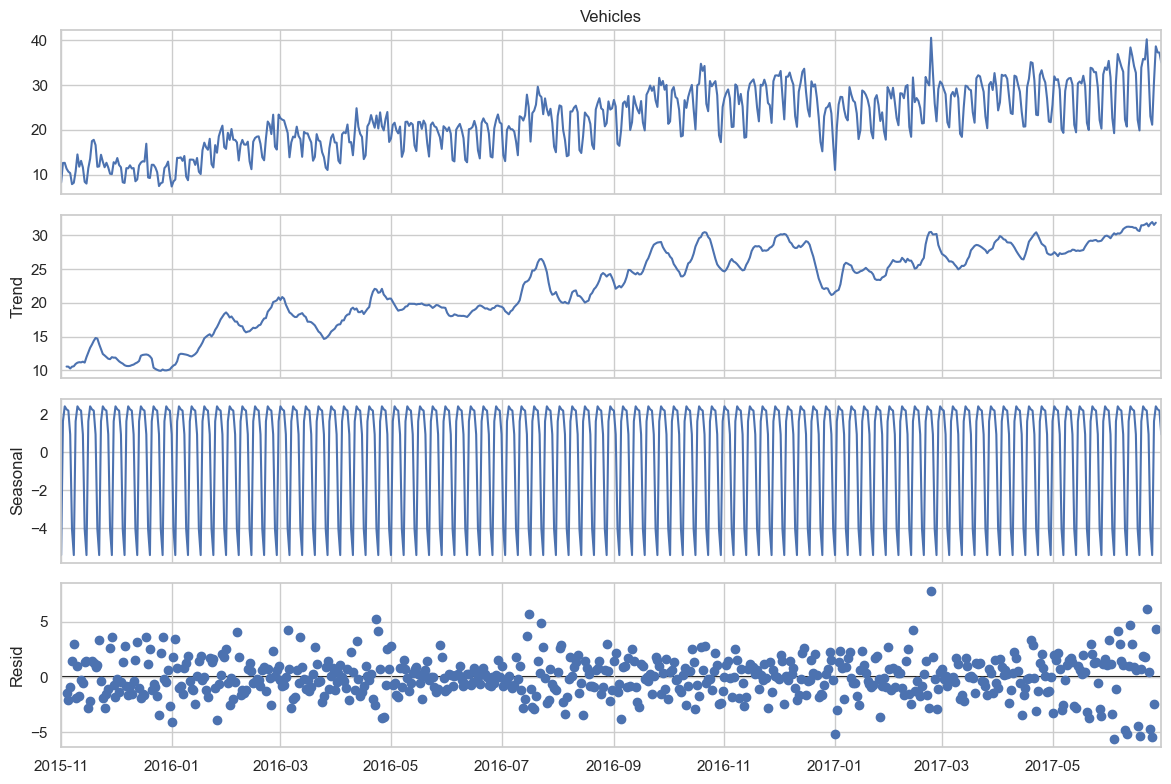

In [69]:
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['Hour'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek

# Peak Hour Analysis

avg_traffic_by_hour = traffic_data.groupby('Hour')['Vehicles'].mean()
avg_traffic_by_hour.plot(kind='bar')
plt.show()

# Day of the Week Analysis

avg_traffic_by_day = traffic_data.groupby('DayOfWeek')['Vehicles'].mean()
avg_traffic_by_day.plot(kind='bar')
plt.show()

# Time Series Decomposition

traffic_data_daily = traffic_data.set_index('DateTime').resample('D').mean()
decomposition = seasonal_decompose(traffic_data_daily['Vehicles'], model='additive')
decomposition.plot()
plt.show()

#  Time Series Decomposition

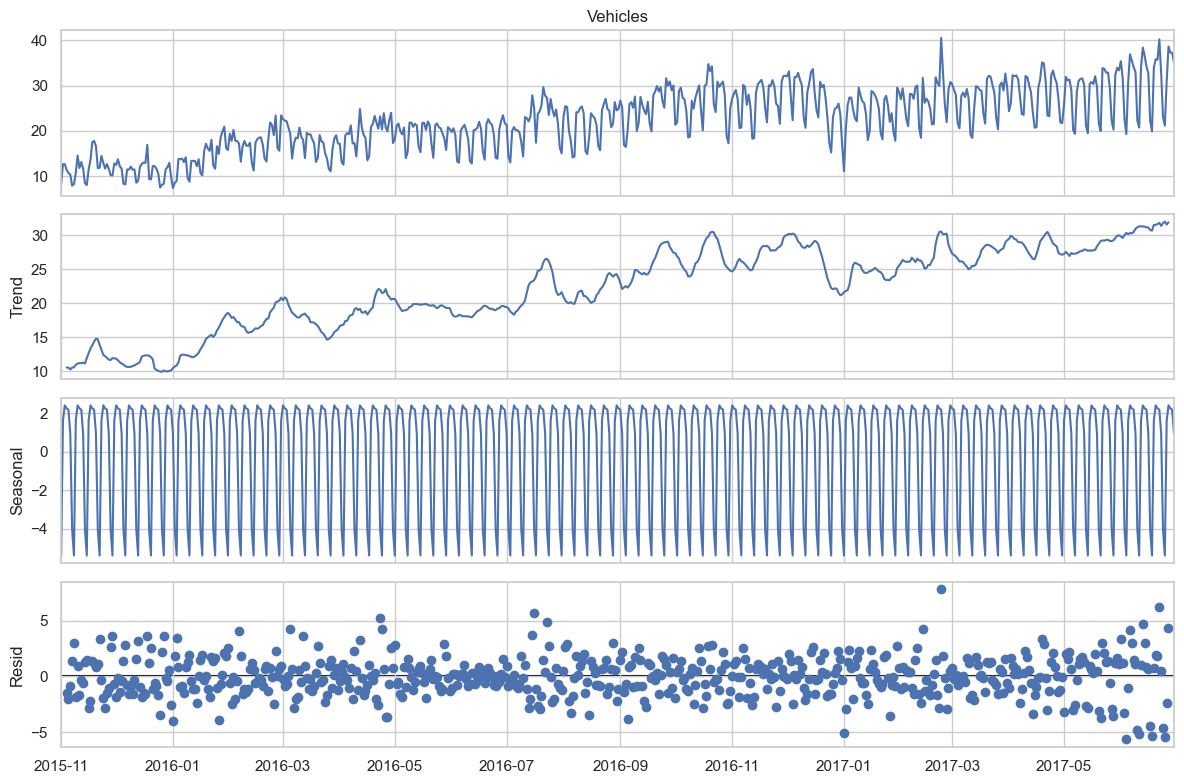

In [70]:
traffic_data = pd.read_csv('traffic.csv')


traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data.set_index('DateTime', inplace=True)

# Resample the data to get daily averages
daily_traffic = traffic_data.resample('D').mean()

# Perform the seasonal decomposition
result = seasonal_decompose(daily_traffic['Vehicles'], model='additive', period=7)


plt.rcParams['figure.figsize'] = [12, 8]

result.plot()
plt.tight_layout()
plt.show()

# Correlation Analysis 

In [71]:
traffic_data = pd.read_csv('traffic.csv')

# Convert 'DateTime' to datetime and create new time-related features
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['HourOfDay'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate the correlation matrix
correlation_matrix = traffic_data[['HourOfDay', 'DayOfWeek', 'Vehicles']].corr()

print(correlation_matrix)

              HourOfDay     DayOfWeek  Vehicles
HourOfDay  1.000000e+00  6.442124e-18  0.219938
DayOfWeek  6.442124e-18  1.000000e+00 -0.126027
Vehicles   2.199377e-01 -1.260265e-01  1.000000


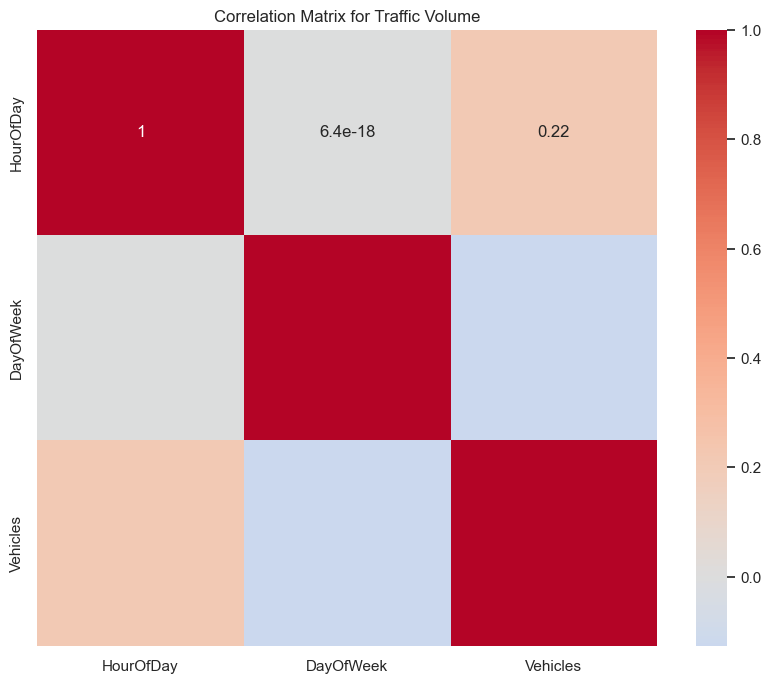

In [72]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Traffic Volume')
plt.show()

# Day of Week Analysis

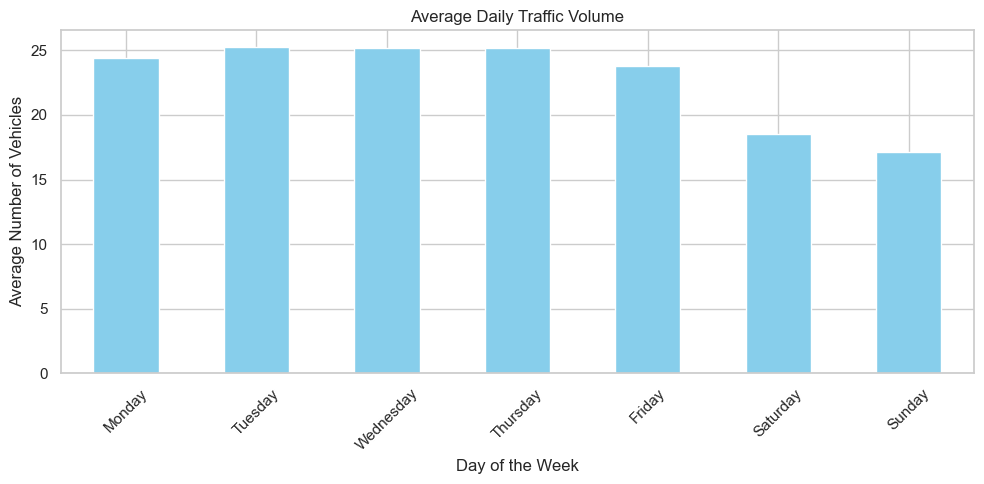

In [73]:
traffic_data = pd.read_csv('traffic.csv')

traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Extract the day of the week from 'DateTime' (Monday=0, Sunday=6)
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek

# Group by 'DayOfWeek' and calculate the mean number of vehicles
average_traffic_by_day = traffic_data.groupby('DayOfWeek')['Vehicles'].mean()

# Create a mapping from day numbers to names for better readability
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_traffic_by_day.index = average_traffic_by_day.index.map(day_names)

plt.figure(figsize=(10, 5))
average_traffic_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Daily Traffic Volume')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Holiday Effects 

In [74]:
# Sample list of public holiday dates in the 'YYYY-MM-DD' format
public_holidays = ['2016-01-01', '2016-07-04', '2016-12-25'] # as an example


public_holidays = pd.to_datetime(public_holidays)

# Mark the holidays in the traffic data
traffic_data['IsHoliday'] = traffic_data['DateTime'].dt.date.isin(public_holidays.date)

# Group by the holiday marker
holiday_traffic = traffic_data.groupby('IsHoliday')['Vehicles'].mean().reset_index()

# holiday_traffic will give you a DataFrame with average traffic volumes on holidays vs. non-holidays

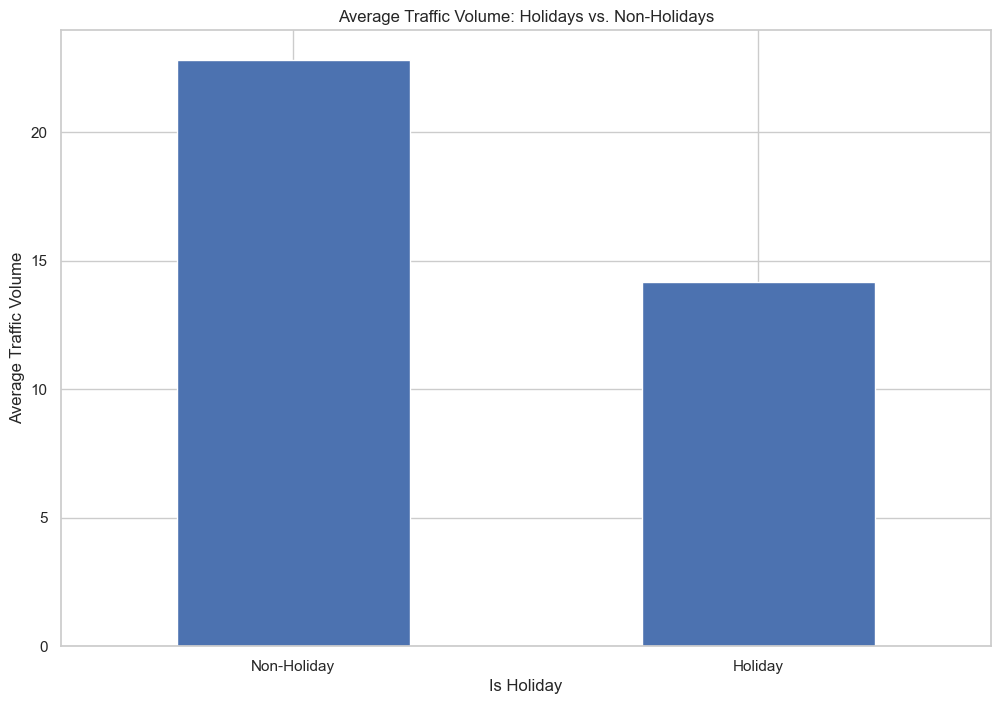

In [75]:
# Step 1: Define a hypothetical list of public holiday dates
public_holidays = ['2016-01-01', '2016-07-04', '2016-12-25']  # Hypothetical holidays

# Convert holiday dates to datetime
public_holidays = pd.to_datetime(public_holidays)

# Step 2: Create a holiday indicator in the traffic data
traffic_data['IsHoliday'] = traffic_data['DateTime'].dt.normalize().isin(public_holidays)

# Step 3: Calculate the average traffic volumes for holidays and non-holidays
holiday_traffic = traffic_data.groupby('IsHoliday')['Vehicles'].mean()

# Step 4: Visualization
holiday_traffic.plot(kind='bar')
plt.title('Average Traffic Volume: Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Traffic Volume')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

# Long-term Trends 

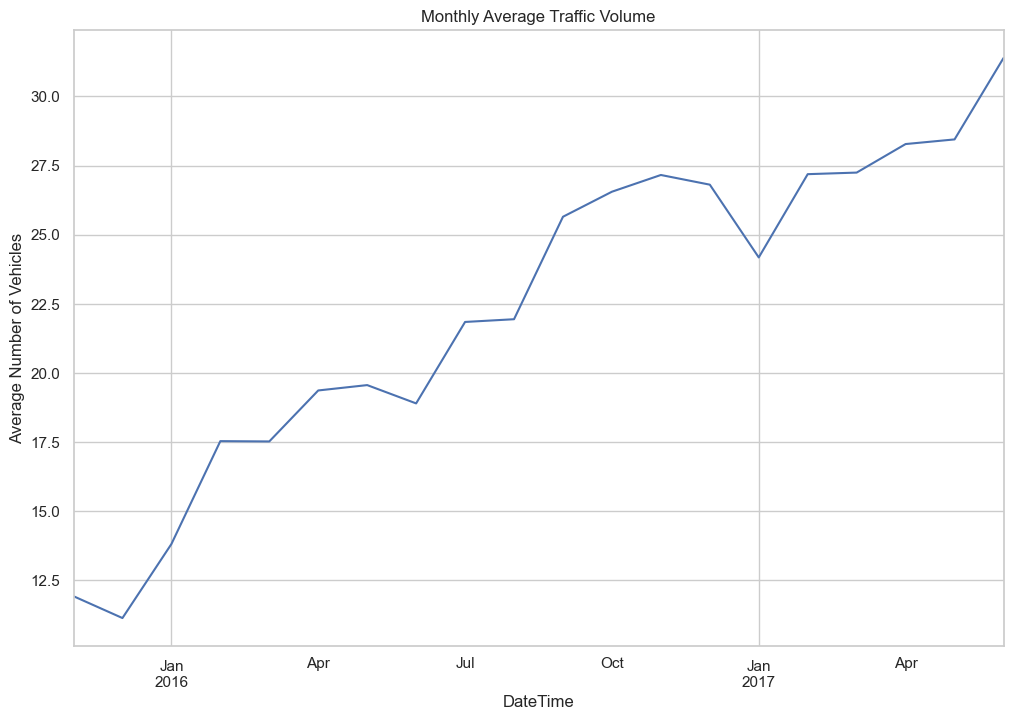

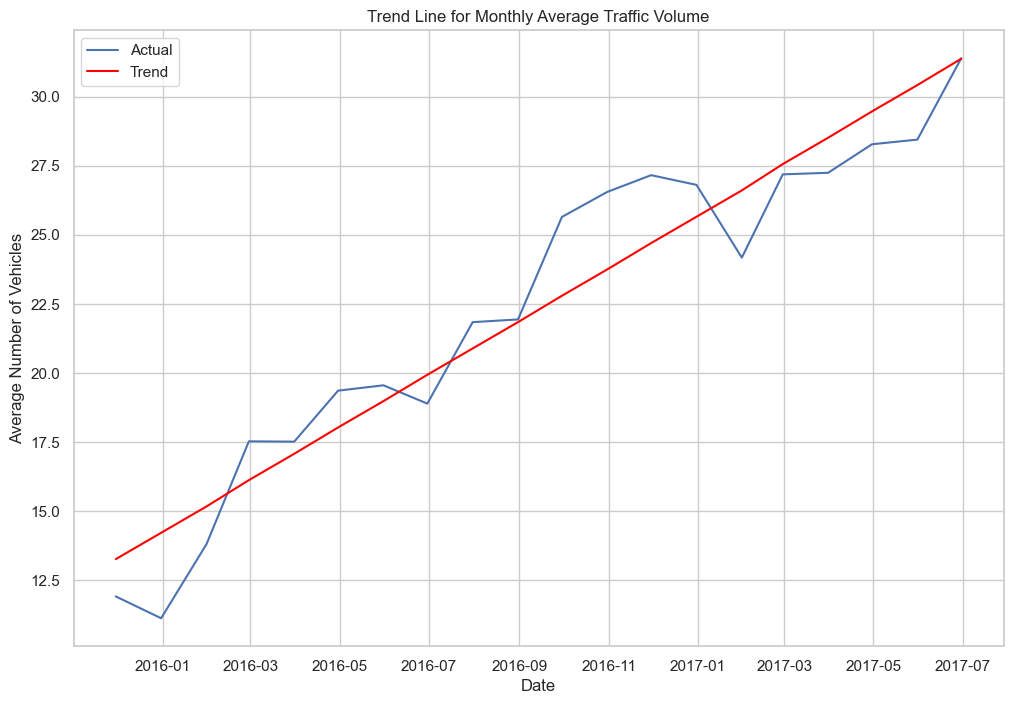

In [76]:
traffic_data = pd.read_csv('traffic.csv')
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Resample the data to get monthly averages
traffic_data.set_index('DateTime', inplace=True)
monthly_traffic = traffic_data.resample('M').mean()

# Plot the monthly traffic volume
monthly_traffic['Vehicles'].plot(title='Monthly Average Traffic Volume')
plt.ylabel('Average Number of Vehicles')
plt.show()

# Linear Regression for Trend Analysis

X = np.arange(len(monthly_traffic)).reshape(-1, 1)  # Time as an independent variable
y = monthly_traffic['Vehicles'].values  # Traffic volume as the dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predict the trend
trend = model.predict(X)

# Plot the trend
plt.plot(monthly_traffic.index, y, label='Actual')
plt.plot(monthly_traffic.index, trend, label='Trend', color='red')
plt.title('Trend Line for Monthly Average Traffic Volume')
plt.xlabel('Date')
plt.ylabel('Average Number of Vehicles')
plt.legend()
plt.show()

In [77]:
# To analyze long-term trends, we'll use the resampled daily mean traffic data that we created earlier
# First, let's check if it is still available in the environment.

# Check if 'traffic_data_resampled' is available and print the first few entries
try:
    print(traffic_data_resampled.head())
except NameError:
    # If not, recreate it
    traffic_data_resampled = traffic_data.set_index('DateTime').resample('D').mean()['Vehicles']
    print(traffic_data_resampled.head())

            Junction   Vehicles            ID
DateTime                                     
2015-11-01       2.0   8.277778  2.015110e+10
2015-11-02       2.0  12.625000  2.015110e+10
2015-11-03       2.0  12.652778  2.015110e+10
2015-11-04       2.0  11.361111  2.015110e+10
2015-11-05       2.0  10.694444  2.015111e+10


# Junction Comparison

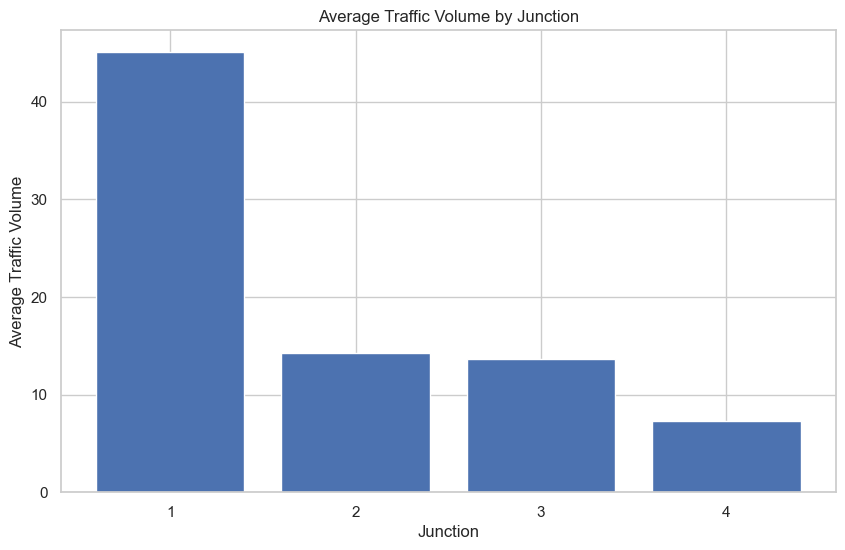

In [78]:
traffic_data = pd.read_csv('traffic.csv')

# Convert 'DateTime' to a datetime object for easier manipulation
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Group the data by 'Junction' and calculate the average 'Vehicles'
junction_comparison = traffic_data.groupby('Junction')['Vehicles'].mean().reset_index()

# Plotting the average traffic volume by junction
plt.figure(figsize=(10, 6))
plt.bar(junction_comparison['Junction'], junction_comparison['Vehicles'])
plt.title('Average Traffic Volume by Junction')
plt.xlabel('Junction')
plt.ylabel('Average Traffic Volume')
plt.xticks(junction_comparison['Junction'])
plt.show()

In [79]:
avg_traffic_by_junction = traffic_data.groupby('Junction')['Vehicles'].mean()
avg_traffic_by_junction

Junction
1    45.052906
2    14.253221
3    13.694010
4     7.251611
Name: Vehicles, dtype: float64

In [80]:
traffic_data = pd.read_csv('traffic.csv')

In [81]:
traffic_data

,DateTime,Junction,Vehicles,ID
0,11/1/2015 0:00,1,15,20151101001
1,11/1/2015 1:00,1,13,20151101011
2,11/1/2015 2:00,1,10,20151101021
3,11/1/2015 3:00,1,7,20151101031
4,11/1/2015 4:00,1,9,20151101041
...,...,...,...,...
48115,6/30/2017 19:00,4,11,20170630194
48116,6/30/2017 20:00,4,30,20170630204
48117,6/30/2017 21:00,4,16,20170630214
48118,6/30/2017 22:00,4,22,20170630224


In [82]:
traffic_data = pd.read_csv('traffic.csv')

traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Set the 'DateTime' column as the index
traffic_data.set_index('DateTime', inplace=True)

# Resample the data by day to get the total number of vehicles per day
daily_traffic = traffic_data.resample('D').sum()

# Calculate the Z-scores for the daily traffic volume
daily_traffic['Z-Score'] = zscore(daily_traffic['Vehicles'])

# Define a threshold for identifying outliers
threshold = 2

# Identify outliers
outliers = daily_traffic[(daily_traffic['Z-Score'] > threshold) | (daily_traffic['Z-Score'] < -threshold)]

# Display the outliers
print(outliers)

            Junction  Vehicles             ID   Z-Score
DateTime                                               
2017-02-23       240      3892  1936341419280  2.849179
2017-04-19       240      3370  1936360235280  2.136948
2017-04-20       240      3352  1936360331280  2.112388
2017-06-01       240      3397  1936377707280  2.173788
2017-06-06       240      3544  1936378187280  2.374358
2017-06-07       240      3411  1936378283280  2.192890
2017-06-08       240      3273  1936378379280  2.004598
2017-06-13       240      3685  1936378859280  2.566743
2017-06-14       240      3506  1936378955280  2.322510
2017-06-15       240      3284  1936379051280  2.019607
2017-06-20       240      3440  1936379531280  2.232458
2017-06-21       240      3426  1936379627280  2.213356
2017-06-22       240      3859  1936379723280  2.804153
2017-06-27       240      3709  1936380203280  2.599489
2017-06-28       240      3579  1936380299280  2.422113
2017-06-29       240      3575  1936380395280  2

In [83]:
# Check if 'DateTime' is already the index to avoid the KeyError

if not isinstance(traffic_data.index, pd.DatetimeIndex):
    traffic_data.set_index('DateTime', inplace=True)

# Now, resample the data by day to get the total number of vehicles per day
daily_traffic = traffic_data.resample('D').sum()

# Calculate the Z-scores for the daily traffic volume
daily_traffic['Z-Score'] = stats.zscore(daily_traffic['Vehicles'])

# Define outliers as any data point that is more than 3 standard deviations from the mean
outliers = daily_traffic[np.abs(daily_traffic['Z-Score']) > 2]

# Display the outliers
outliers[['Vehicles', 'Z-Score']]

,Vehicles,Z-Score
DateTime,,
2017-02-23,3892,2.849179
2017-04-19,3370,2.136948
2017-04-20,3352,2.112388
2017-06-01,3397,2.173788
2017-06-06,3544,2.374358
2017-06-07,3411,2.192890
2017-06-08,3273,2.004598
2017-06-13,3685,2.566743
2017-06-14,3506,2.322510


In [84]:
weather_data = pd.read_csv('weather_data_filtered.csv')
traffic_data = pd.read_csv('traffic.csv')

In [85]:
weather_data

,utc_timestamp,AT_temperature,AT_radiation_direct_horizontal,AT_radiation_diffuse_horizontal,BE_temperature,BE_radiation_direct_horizontal,BE_radiation_diffuse_horizontal,BG_temperature,BG_radiation_direct_horizontal,BG_radiation_diffuse_horizontal,...,RO_radiation_diffuse_horizontal,SE_temperature,SE_radiation_direct_horizontal,SE_radiation_diffuse_horizontal,SI_temperature,SI_radiation_direct_horizontal,SI_radiation_diffuse_horizontal,SK_temperature,SK_radiation_direct_horizontal,SK_radiation_diffuse_horizontal
0,2015-11-01T00:00:00Z,2.564,0.000000,0.000000,6.724,0.00000,0.00000,1.317,0.0,0.0,...,0.0,7.235,0.000000,0.000000,2.569,0.0,0.0,1.715,0.0,0.0
1,2015-11-01T01:00:00Z,2.139,0.000000,0.000000,6.812,0.00000,0.00000,1.055,0.0,0.0,...,0.0,7.180,0.000000,0.000000,2.066,0.0,0.0,1.578,0.0,0.0
2,2015-11-01T02:00:00Z,1.853,0.000000,0.000000,6.896,0.00000,0.00000,0.826,0.0,0.0,...,0.0,7.145,0.000000,0.000000,1.713,0.0,0.0,1.534,0.0,0.0
3,2015-11-01T03:00:00Z,1.506,0.000000,0.000000,6.894,0.00000,0.00000,0.719,0.0,0.0,...,0.0,7.118,0.000000,0.000000,1.304,0.0,0.0,1.375,0.0,0.0
4,2015-11-01T04:00:00Z,1.074,0.000000,0.000000,6.896,0.00000,0.00000,0.667,0.0,0.0,...,0.0,7.087,0.000000,0.000000,0.881,0.0,0.0,0.869,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14587,2017-06-30T19:00:00Z,15.840,0.000454,0.024546,16.929,0.47807,10.84053,27.600,0.0,0.0,...,0.0,15.020,1.179385,15.524715,16.320,0.0,0.0,18.345,0.0,0.0
14588,2017-06-30T20:00:00Z,15.123,0.000000,0.000000,15.990,0.00000,0.00000,25.917,0.0,0.0,...,0.0,14.315,0.085380,1.152220,15.840,0.0,0.0,18.078,0.0,0.0
14589,2017-06-30T21:00:00Z,14.565,0.000000,0.000000,15.532,0.00000,0.00000,24.567,0.0,0.0,...,0.0,13.856,0.003658,0.085942,15.469,0.0,0.0,17.815,0.0,0.0
14590,2017-06-30T22:00:00Z,14.045,0.000000,0.000000,15.144,0.00000,0.00000,23.634,0.0,0.0,...,0.0,13.510,0.001075,0.029625,15.157,0.0,0.0,17.212,0.0,0.0


In [86]:
weather_data = weather_data.rename(columns={'utc_timestamp': 'DateTime'})

In [87]:
traffic_data

,DateTime,Junction,Vehicles,ID
0,11/1/2015 0:00,1,15,20151101001
1,11/1/2015 1:00,1,13,20151101011
2,11/1/2015 2:00,1,10,20151101021
3,11/1/2015 3:00,1,7,20151101031
4,11/1/2015 4:00,1,9,20151101041
...,...,...,...,...
48115,6/30/2017 19:00,4,11,20170630194
48116,6/30/2017 20:00,4,30,20170630204
48117,6/30/2017 21:00,4,16,20170630214
48118,6/30/2017 22:00,4,22,20170630224


In [88]:
print(traffic_data['DateTime'].head())
print(weather_data['DateTime'].head())

0    11/1/2015 0:00
1    11/1/2015 1:00
2    11/1/2015 2:00
3    11/1/2015 3:00
4    11/1/2015 4:00
Name: DateTime, dtype: object
0    2015-11-01T00:00:00Z
1    2015-11-01T01:00:00Z
2    2015-11-01T02:00:00Z
3    2015-11-01T03:00:00Z
4    2015-11-01T04:00:00Z
Name: DateTime, dtype: object


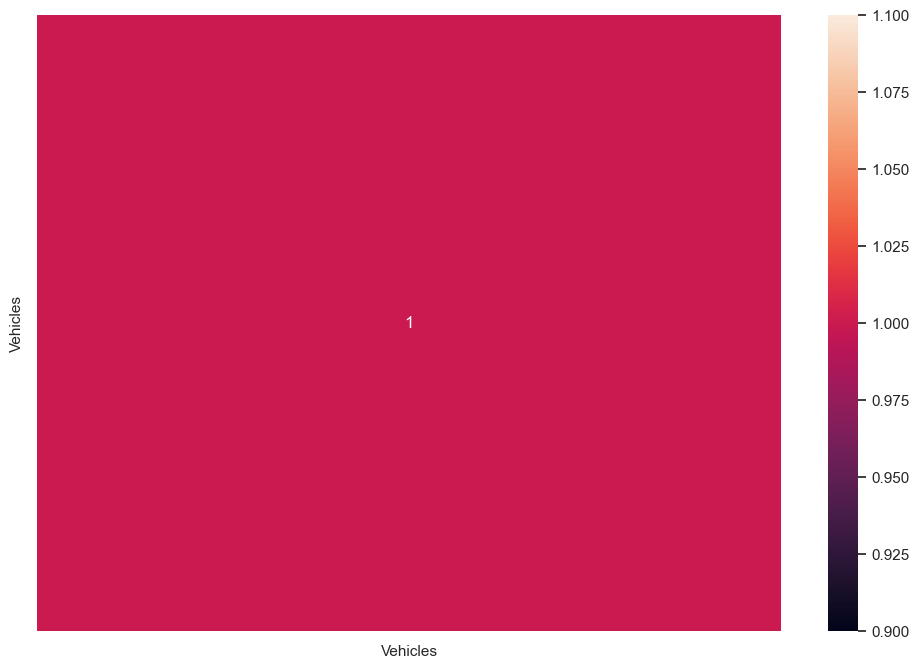

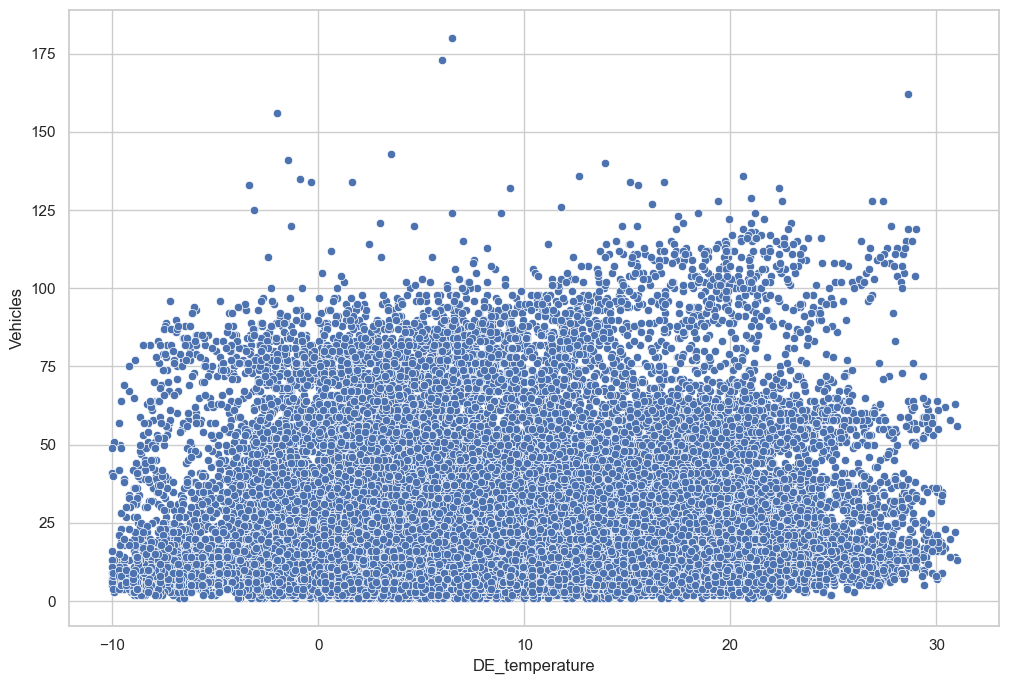

In [89]:
# Convert the 'DateTime' columns in both datasets to pandas datetime objects
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Make sure 'utc_timestamp' is a datetime object and remove timezone information
weather_data['DateTime'] = pd.to_datetime(weather_data['DateTime']).dt.tz_localize(None)

# Select the relevant weather columns for Germany
weather_data_de = weather_data[['DateTime', 'DE_temperature']]

# Merge the datasets on the timestamp fields
combined_data = pd.merge_asof(traffic_data.sort_values('DateTime'),
                              weather_data_de.sort_values('DateTime'),
                              left_on='DateTime', right_on='DateTime',
                              direction='nearest')



# Correlation analysis
correlation_matrix = combined_data[['Vehicles', 'DateTime']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Scatter plot of temperature vs traffic volume
sns.scatterplot(data=combined_data, x='DE_temperature', y='Vehicles')
plt.show()


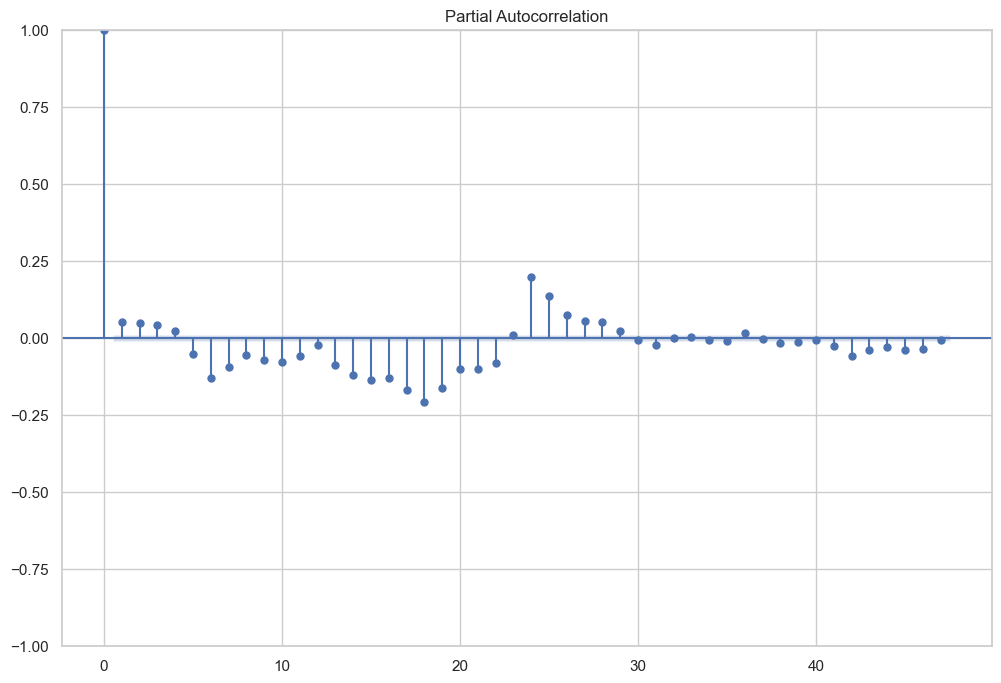

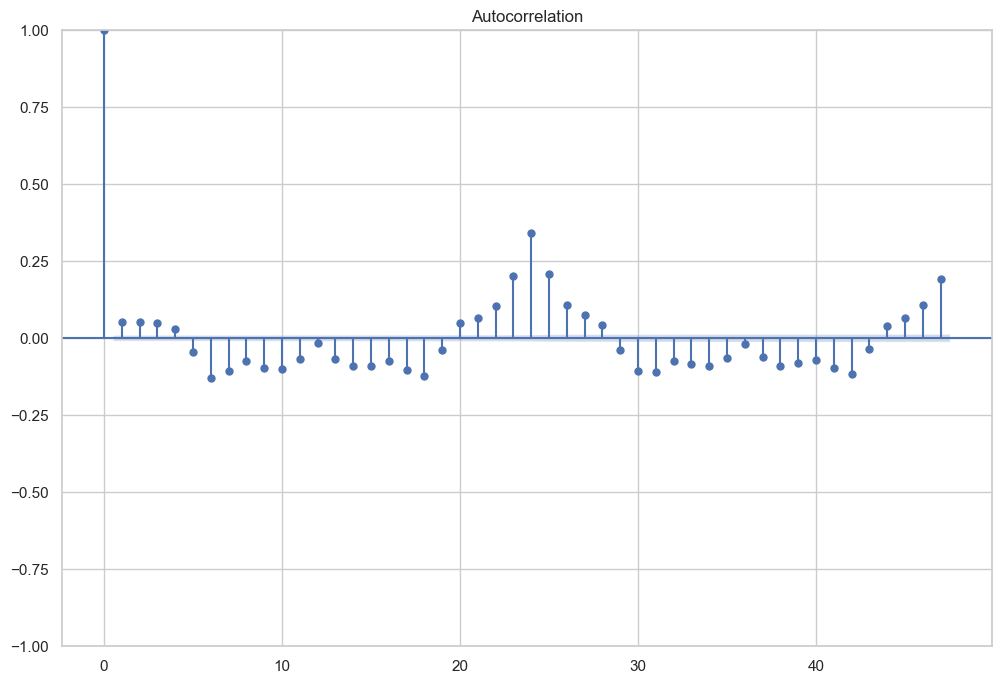

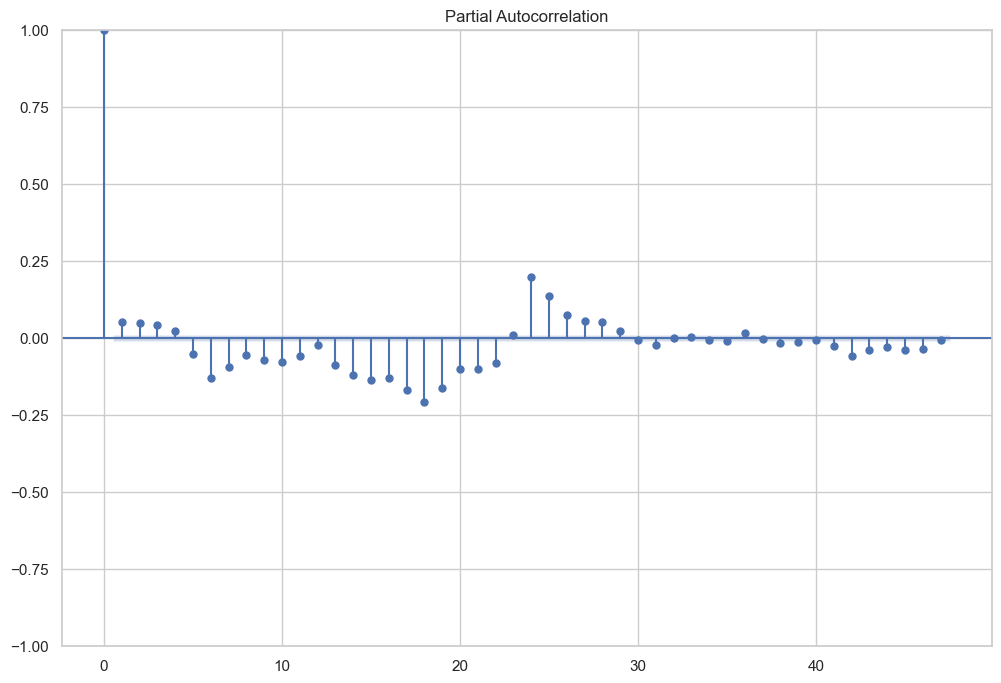

In [92]:
plot_acf(traffic_data['Vehicles_diff'].dropna())
plot_pacf(traffic_data['Vehicles_diff'].dropna())

# Impact of External Factors 

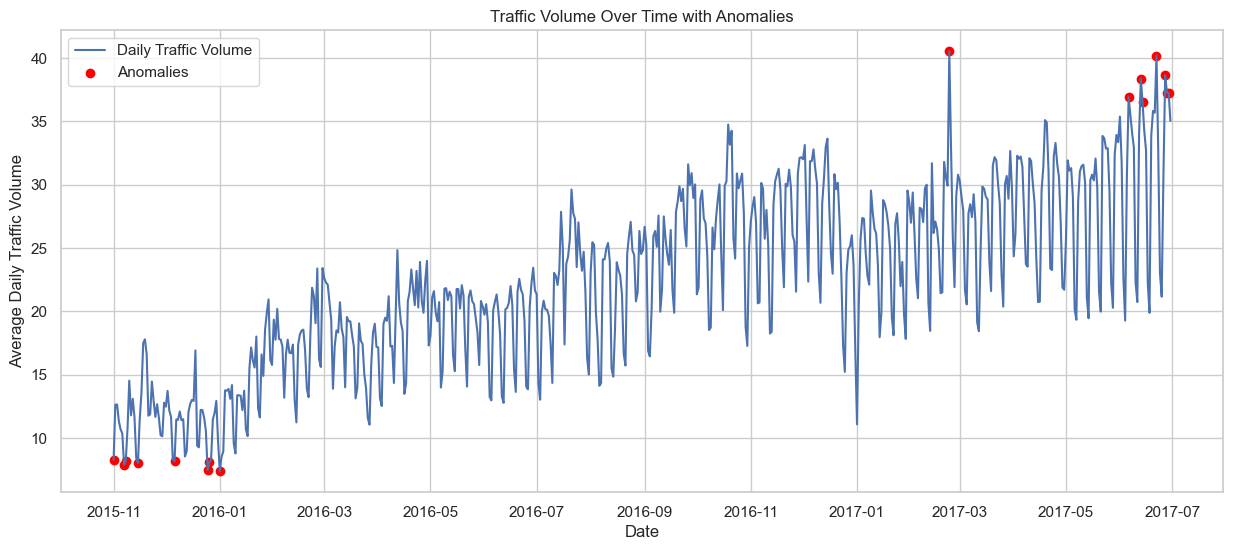

In [93]:
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data_daily = traffic_data.set_index('DateTime').resample('D').mean()

# Calculate the Z-score for each day's traffic volume
traffic_data_daily['z_score'] = (traffic_data_daily['Vehicles'] - traffic_data_daily['Vehicles'].mean()) / traffic_data_daily['Vehicles'].std()

# Identify days where the Z-score is above a certain threshold (e.g., 2 or -2 for significant anomalies)
anomalies = traffic_data_daily[abs(traffic_data_daily['z_score']) > 2]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(traffic_data_daily.index, traffic_data_daily['Vehicles'], label='Daily Traffic Volume')
plt.scatter(anomalies.index, anomalies['Vehicles'], color='red', label='Anomalies')
plt.xlabel('Date')
plt.ylabel('Average Daily Traffic Volume')
plt.title('Traffic Volume Over Time with Anomalies')
plt.legend()
plt.show()

# Check for Missing Data

In [94]:
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data = traffic_data.sort_values(by='DateTime')

# Check for missing timestamps
expected_timestamps = pd.date_range(start=traffic_data['DateTime'].min(), 
                                    end=traffic_data['DateTime'].max(), 
                                    freq='H')
missing_timestamps = expected_timestamps.difference(traffic_data['DateTime'])

# Consistency of Data Reporting

In [95]:
# Check the number of records per junction
records_per_junction = traffic_data['Junction'].value_counts()

# Check for irregular time intervals
time_diffs = traffic_data.groupby('Junction').apply(lambda x: x['DateTime'].diff().unique())

# Analyze Time Range for Each Junction

In [96]:
# Get the time range for each junction
time_range_per_junction = traffic_data.groupby('Junction')['DateTime'].agg(['min', 'max'])

# Outlier Detection

In [97]:
# Detecting outliers in 'Vehicles' column
Q1 = traffic_data['Vehicles'].quantile(0.25)
Q3 = traffic_data['Vehicles'].quantile(0.75)
IQR = Q3 - Q1
outliers = traffic_data[(traffic_data['Vehicles'] < (Q1 - 1.5 * IQR)) | (traffic_data['Vehicles'] > (Q3 + 1.5 * IQR))]

Missing Timestamps:
DatetimeIndex([], dtype='datetime64[ns]', freq=None)

Records per Junction:
1    14592
2    14592
3    14592
4     4344
Name: Junction, dtype: int64

Time Intervals:
Junction
1    [NaT, 3600000000000 nanoseconds]
2    [NaT, 3600000000000 nanoseconds]
3    [NaT, 3600000000000 nanoseconds]
4    [NaT, 3600000000000 nanoseconds]
dtype: object

Time Range for Each Junction:
                min                 max
Junction                               
1        2015-11-01 2017-06-30 23:00:00
2        2015-11-01 2017-06-30 23:00:00
3        2015-11-01 2017-06-30 23:00:00
4        2017-01-01 2017-06-30 23:00:00

Outliers in Vehicle Counts:
                 DateTime  Junction  Vehicles           ID  Vehicles_diff
31531 2016-02-06 19:00:00         3        71  20160206193           25.0
2603  2016-02-17 11:00:00         1        70  20160217111           38.0
2890  2016-02-29 10:00:00         1        64  20160229101           15.0
2891  2016-02-29 11:00:00         1        

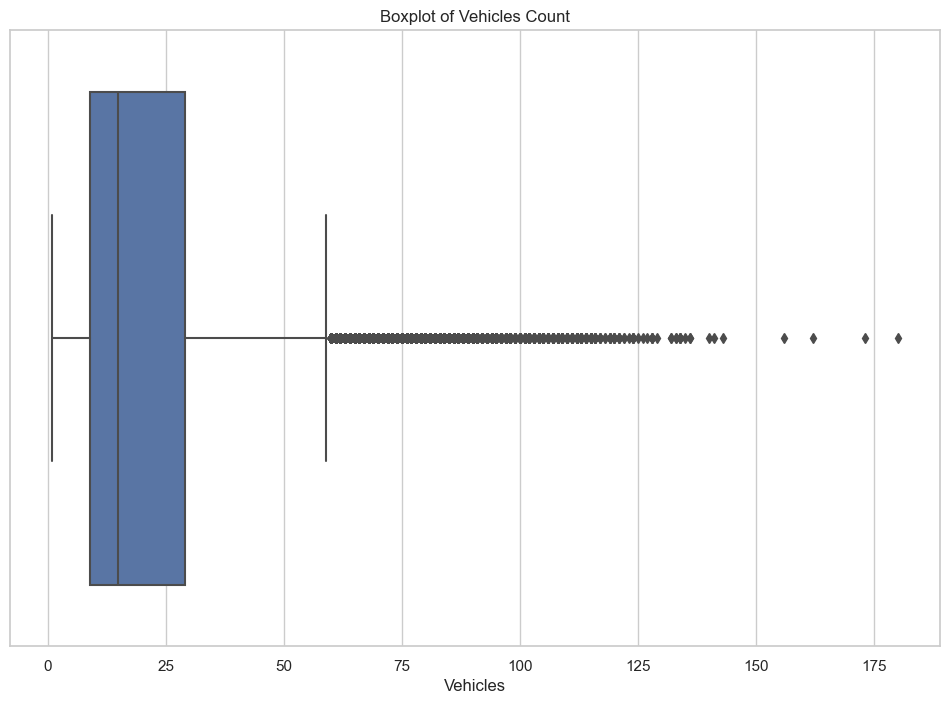

In [98]:
# Step 1: Print Missing Timestamps
print("Missing Timestamps:")
print(missing_timestamps)

# Step 2: Print Records Per Junction and Time Intervals
print("\nRecords per Junction:")
print(records_per_junction)
print("\nTime Intervals:")
print(time_diffs)

# Step 3: Print Time Range for Each Junction
print("\nTime Range for Each Junction:")
print(time_range_per_junction)

# Step 4: Print and Visualize Outliers
print("\nOutliers in Vehicle Counts:")
print(outliers)

# Visualizing Outliers with a Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=traffic_data['Vehicles'])
plt.title('Boxplot of Vehicles Count')
plt.show()

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Read the traffic data
traffic_data = pd.read_csv('traffic.csv')

# Feature Engineering
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['HourOfDay'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek

# Encode categorical variable 'Junction'
traffic_data = pd.get_dummies(traffic_data, columns=['Junction'], drop_first=True)

# Define features and target
features = ['HourOfDay', 'DayOfWeek', 'Junction_2', 'Junction_3', 'Junction_4']
target = 'Vehicles'

# Split the data into training and testing sets
train_data, test_data = train_test_split(traffic_data, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(train_data[features], train_data[target])

# Model Prediction
predictions = model.predict(test_data[features])

# Model Evaluation
mae = mean_absolute_error(test_data[target], predictions)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 9.07005603205783


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume 'traffic_data' is your DataFrame

# Define features and target
features = ['HourOfDay', 'DayOfWeek', 'Junction_2', 'Junction_3', 'Junction_4']
target = 'Vehicles'

# Set a threshold to classify as high or low traffic
threshold = 10  # You can adjust this threshold based on your problem

# Create a binary target variable
traffic_data['TrafficLevel'] = (traffic_data[target] > threshold).astype(int)

# Split the data into training and testing sets
train_data, test_data = train_test_split(traffic_data, test_size=0.3, random_state=42)

# Separate features and target in the training and testing sets
X_train, y_train = train_data[features], train_data['TrafficLevel']
X_test, y_test = test_data[features], test_data['TrafficLevel']

# Train a random forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)

# Print the metrics
print(f'Accuracy: {accuracy:.2%}')
print('Classification Report:')
print(classification_report_str)


Accuracy: 82.98%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      4664
           1       0.86      0.89      0.88      9772

    accuracy                           0.83     14436
   macro avg       0.81      0.80      0.80     14436
weighted avg       0.83      0.83      0.83     14436



In [101]:
import pandas as pd
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier

# Assume 'classifier' is your trained RandomForestClassifier
# Assume 'features' is a list of feature names used in training the model

def predict_traffic_level(input_date, hour_of_day, junction):
    # Convert input_date to a datetime object
    input_datetime = datetime.strptime(input_date, '%Y-%m-%d %H:%M:%S')
    
    # Determine the day of the week (Monday is 0, Sunday is 6)
    day_of_week = input_datetime.weekday()
    
    # Create a DataFrame with the input values
    input_data = pd.DataFrame({
        'HourOfDay': [hour_of_day],
        'DayOfWeek': [day_of_week],
        'Junction_2': [1 if junction == 2 else 0],
        'Junction_3': [1 if junction == 3 else 0],
        'Junction_4': [1 if junction == 4 else 0]
    })
    
    # Make a prediction using the trained classifier
    traffic_level = classifier.predict(input_data[features])[0]
    
    # Interpret the predicted traffic level
    if traffic_level == 0:
        return 'Low Traffic'
    elif traffic_level == 1:
        return 'High Traffic'
    else:
        return 'Unknown'

# Example usage
input_date = '2023-01-01 14:00:00'
hour = 14  # Example hour of the day
junction = 1  # Example junction

predicted_traffic_level = predict_traffic_level(input_date, hour, junction)
print(f'Predicted Traffic Level: {predicted_traffic_level}')


Predicted Traffic Level: High Traffic


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assume 'traffic_data' is your DataFrame

# Define features and target
features = ['HourOfDay', 'DayOfWeek', 'Junction_2', 'Junction_3', 'Junction_4']
target = 'Vehicles'

# Set a threshold to classify as high or low traffic
threshold = 10  # You can adjust this threshold based on your problem

# Create a binary target variable
traffic_data['TrafficLevel'] = (traffic_data[target] > threshold).astype(int)

# Split the data into training and testing sets
train_data, test_data = train_test_split(traffic_data, test_size=0.3, random_state=42)

# Separate features and target in the training and testing sets
X_train, y_train = train_data[features], train_data['TrafficLevel']
X_test, y_test = test_data[features], test_data['TrafficLevel']

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)

# Train a Support Vector Machine (SVM) classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)

# Train a k-Nearest Neighbors (KNN) classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)

# Train a Logistic Regression classifier
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_classification_report = classification_report(y_test, lr_predictions)

# Train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)
gb_predictions = gb_classifier.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_classification_report = classification_report(y_test, gb_predictions)

# Print the metrics for each classifier
print('Decision Tree Classifier:')
print(f'Accuracy: {dt_accuracy:.2%}')
print('Classification Report:')
print(dt_classification_report)

print('\nRandom Forest Classifier:')
print(f'Accuracy: {rf_accuracy:.2%}')
print('Classification Report:')
print(rf_classification_report)

print('\nSupport Vector Machine (SVM) Classifier:')
print(f'Accuracy: {svm_accuracy:.2%}')
print('Classification Report:')
print(svm_classification_report)

print('\nk-Nearest Neighbors (KNN) Classifier:')
print(f'Accuracy: {knn_accuracy:.2%}')
print('Classification Report:')
print(knn_classification_report)

print('\nLogistic Regression Classifier:')
print(f'Accuracy: {lr_accuracy:.2%}')
print('Classification Report:')
print(lr_classification_report)

print('\nGradient Boosting Classifier:')
print(f'Accuracy: {gb_accuracy:.2%}')
print('Classification Report:')
print(gb_classification_report)


Decision Tree Classifier:
Accuracy: 82.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      4664
           1       0.86      0.89      0.88      9772

    accuracy                           0.83     14436
   macro avg       0.81      0.80      0.80     14436
weighted avg       0.83      0.83      0.83     14436


Random Forest Classifier:
Accuracy: 82.98%
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.70      0.73      4664
           1       0.86      0.89      0.88      9772

    accuracy                           0.83     14436
   macro avg       0.81      0.80      0.80     14436
weighted avg       0.83      0.83      0.83     14436


Support Vector Machine (SVM) Classifier:
Accuracy: 82.14%
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      4664
           1       0.8